# Morphology operations of Opening and Closing

In [93]:
# import the necessary packages 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [94]:

def debug(thing, title):
    print('--------------------------------------------')
    print(title)
    print(thing)
    print('--------------------------------------------')


def display_imgs(imgs, titles):

    for ind, img in enumerate(imgs):
        print(img.shape)
        if len(img.shape) > 2:
            b,g,r = cv.split(img)
            img = cv.merge((r,g,b))
            plt.imshow(img)
        else:
            plt.imshow(img, cmap='gray')
        plt.title(titles[ind])
        plt.show()


## Clean segmentation errors using Opening

In [95]:
def opening(orig, img, prev_method, kernel):

	gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	

	# binarize the image 
	binr = cv.threshold(gray_image, 0, 255, 
						cv.THRESH_BINARY+cv.THRESH_OTSU)[1] 

	# define the kernel 
	kernel = np.ones((kernel, kernel), np.uint8) 

	# opening the image 
	opening = cv.morphologyEx(binr, cv.MORPH_OPEN, 
							kernel, iterations=1) 
	
	display_imgs([orig, img, gray_image, opening],
			  ['Original',
	  		f'Method applied {prev_method}',
			  'gray',
			'Opening'])


### Opening on Region Growing

(386, 686, 3)


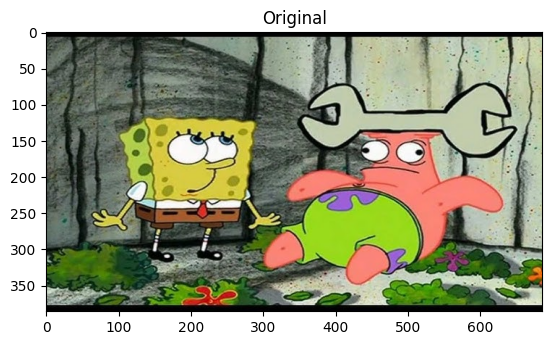

(386, 686, 3)


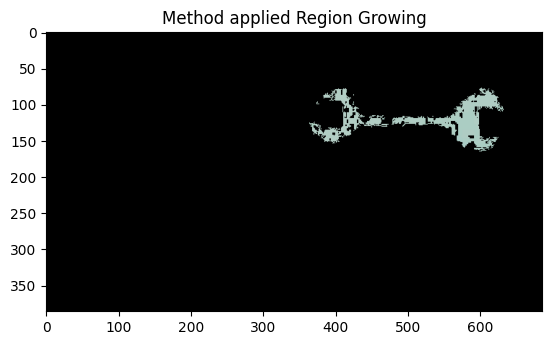

(386, 686)


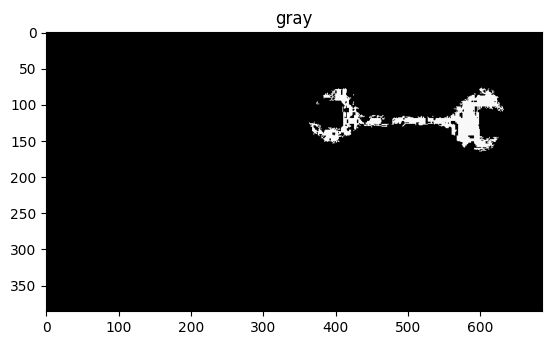

(386, 686)


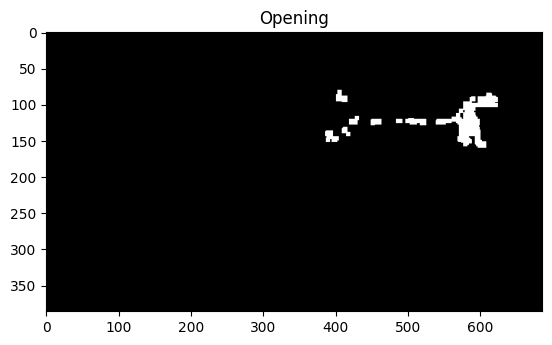

In [96]:
# Section 1 Region Growing
spongebob = cv.imread('testImg1.jpg')
region_growing = cv.imread('regionGrowing.png')

opening(spongebob, region_growing, 'Region Growing', 6)


### Opening on k-means and fuzzy c-means

(168, 300, 3)


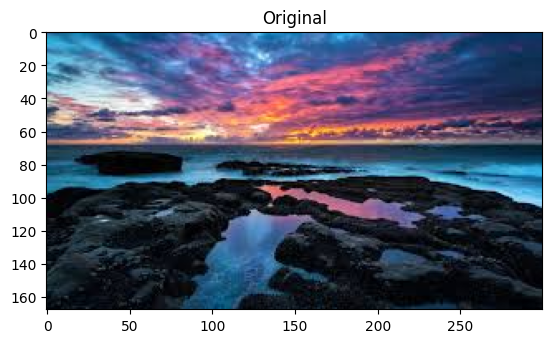

(51, 90, 3)


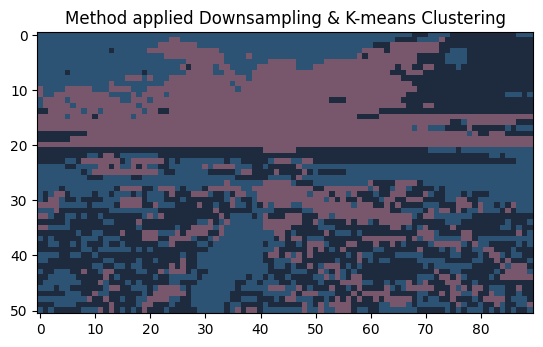

(51, 90)


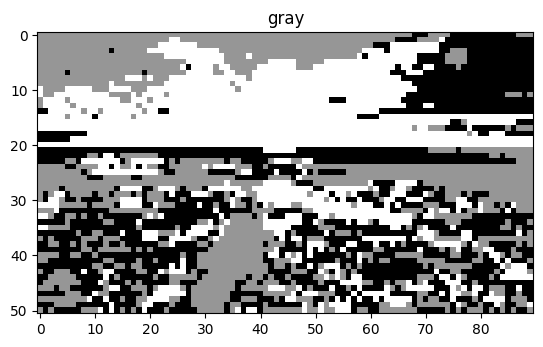

(51, 90)


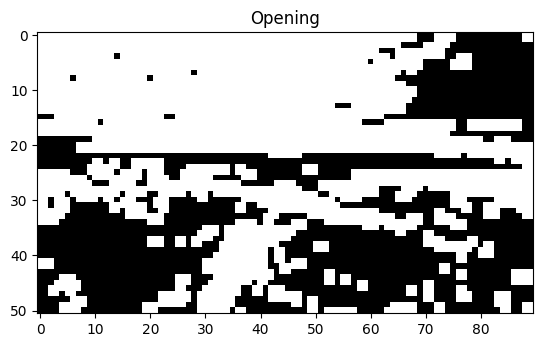

In [97]:
# Section 2 Clustering
beach = cv.imread('beach.jpeg')
kmeans_img = cv.imread('kmeans_img.png')

opening(beach, kmeans_img, 'Downsampling & K-means Clustering', 2)


(168, 300, 3)


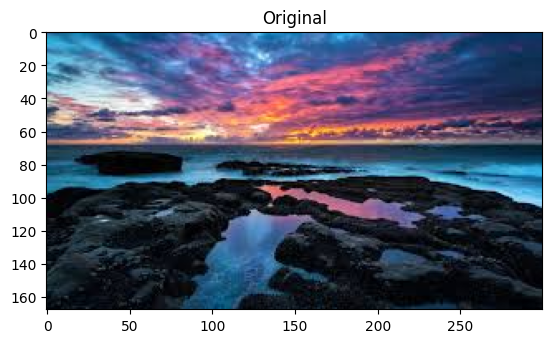

(51, 90, 3)


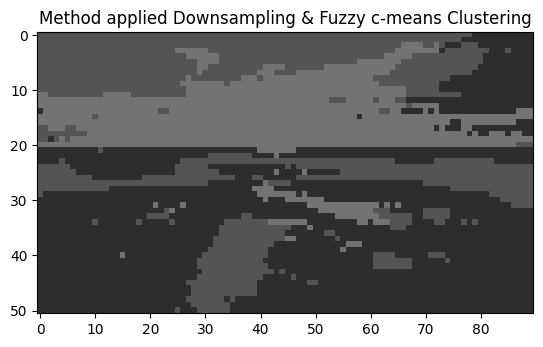

(51, 90)


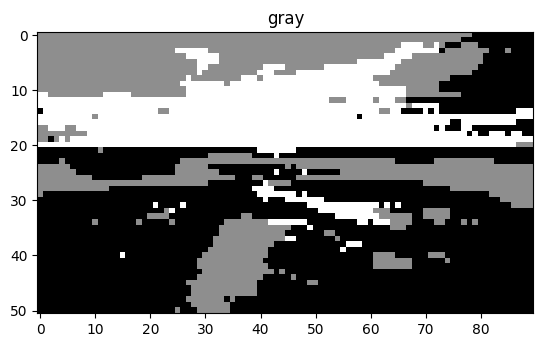

(51, 90)


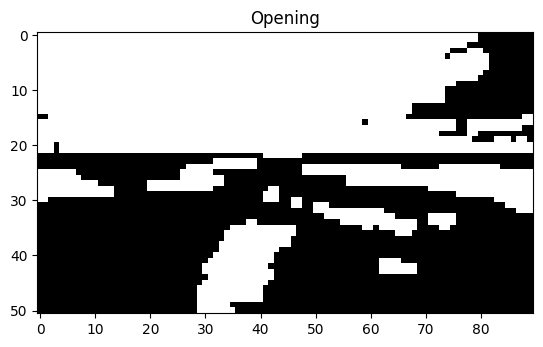

In [98]:
# Section 2 Clustering
beach = cv.imread('beach.jpeg')
cmeans_img = cv.imread('fuzzy_cmeans_img.png')

opening(beach, cmeans_img, 'Downsampling & Fuzzy c-means Clustering', 2)

### Opening on Otsu

(928, 718, 3)


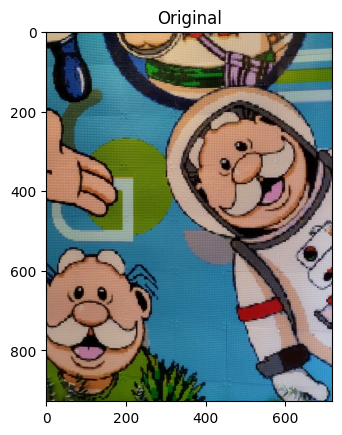

(928, 718, 3)


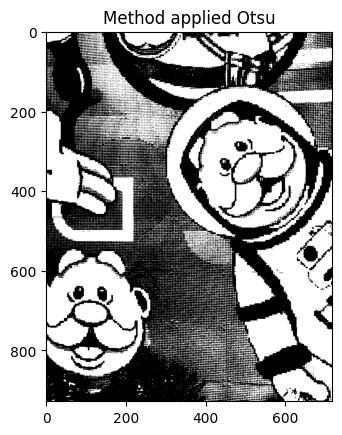

(928, 718)


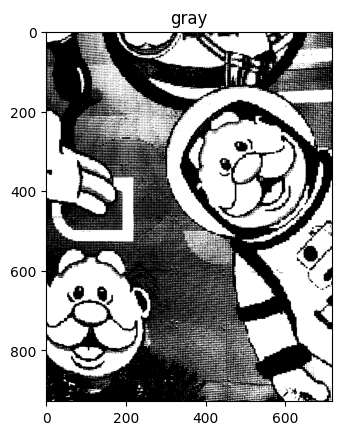

(928, 718)


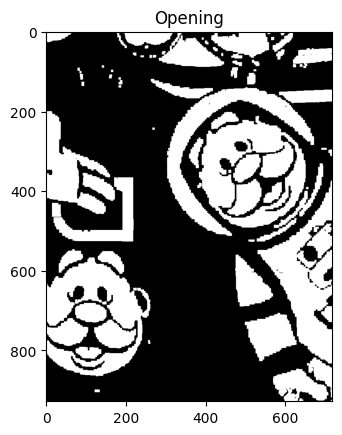

In [99]:
# Section 3 Otsu
simi = cv.imread('img.jpg')
otsu = cv.imread('result.png')

opening(simi, otsu, 'Otsu', 5)



## Clean Segmentation errors using Closing

In [100]:

def closing(orig, img, prev_method, kernel):

    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # binarize the image 
    binr = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1] 

    # define the kernel 
    kernel = np.ones((kernel, kernel), np.uint8) 

    # opening the image 
    closing = cv.morphologyEx(binr, cv.MORPH_CLOSE, kernel, iterations=1) 

    display_imgs([orig, img, gray_image, closing], 
                 ['Original',
                  f'Method Applied {prev_method}',
                  'gray',
                  'Closing'])


### Closing on Region Growing

(386, 686, 3)


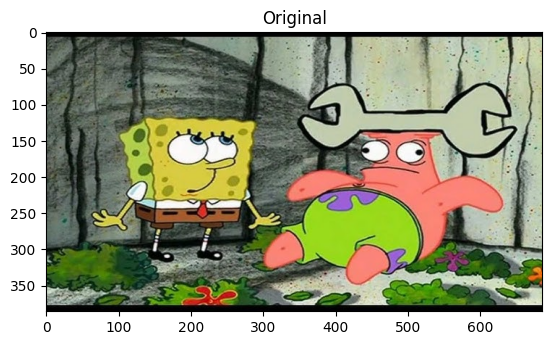

(386, 686, 3)


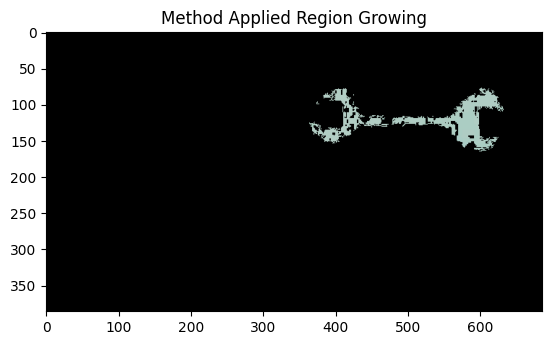

(386, 686)


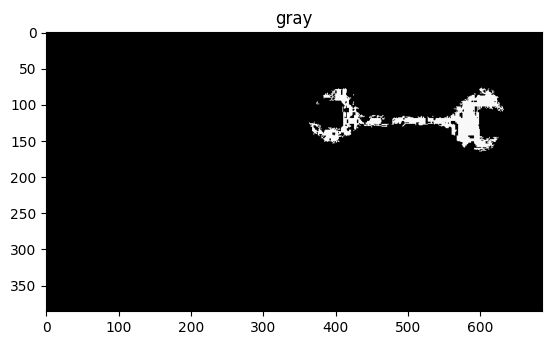

(386, 686)


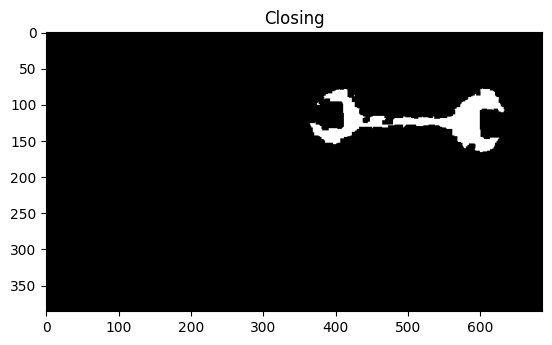

In [101]:
# Section 1 Region Growing
spongebob = cv.imread('testImg1.jpg')
region_growing = cv.imread('regionGrowing.png')

closing(spongebob, region_growing, 'Region Growing', 6)

Interesting how closing works well to fill the gaps of region growing in this case.

### Closing on k-means and fuzzy c-means

(168, 300, 3)


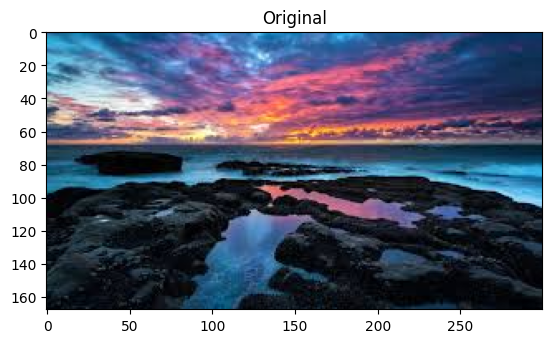

(51, 90, 3)


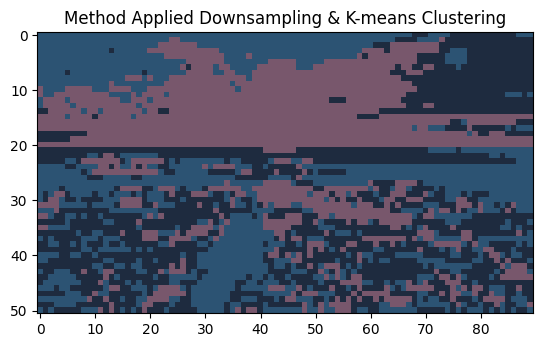

(51, 90)


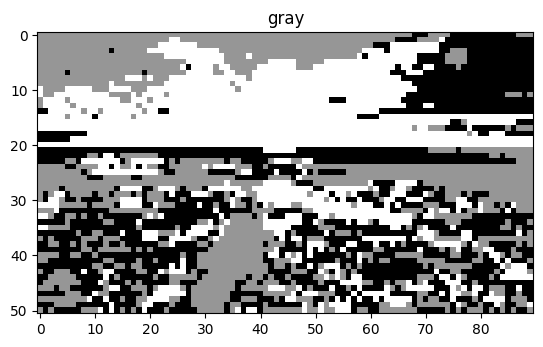

(51, 90)


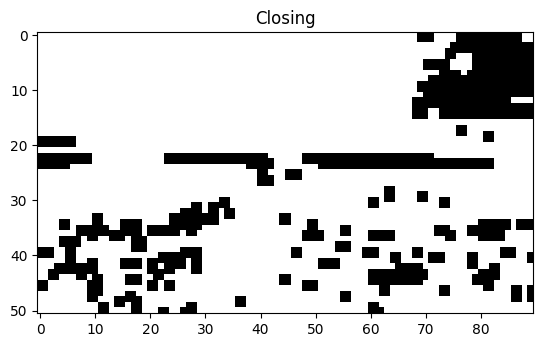

In [102]:
# Section 2 Clustering
beach = cv.imread('beach.jpeg')
kmeans_img = cv.imread('kmeans_img.png')

closing(beach, kmeans_img, 'Downsampling & K-means Clustering', 2)

(168, 300, 3)


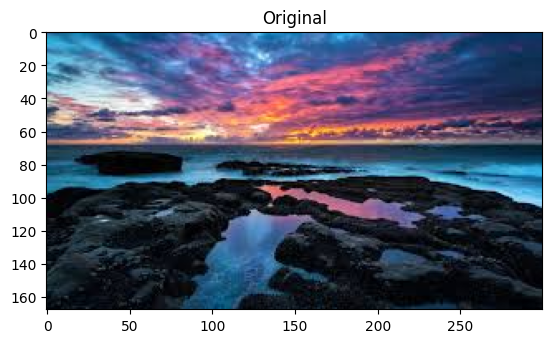

(51, 90, 3)


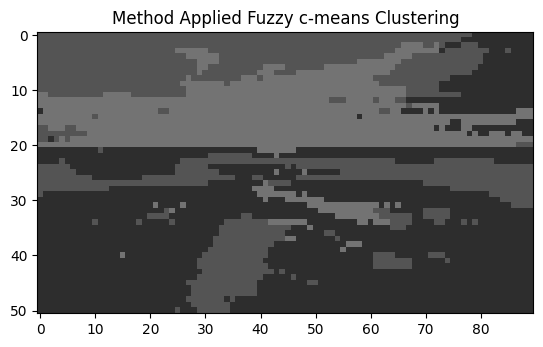

(51, 90)


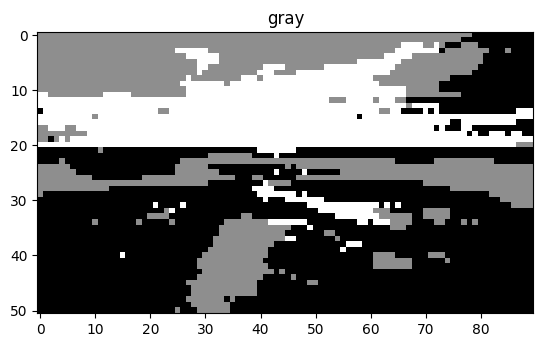

(51, 90)


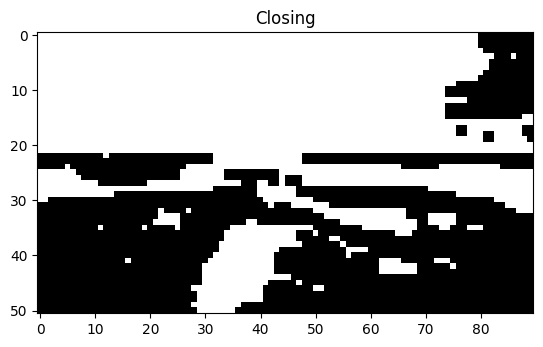

In [103]:
# Section 2 Clustering
beach = cv.imread('beach.jpeg')
cmeans_img = cv.imread('fuzzy_cmeans_img.png')

closing(beach, cmeans_img, 'Fuzzy c-means Clustering', 2)

### Closing on Otsu

(928, 718, 3)


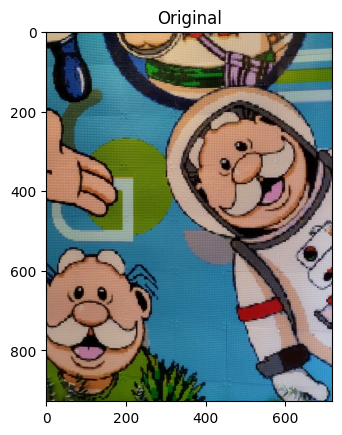

(928, 718, 3)


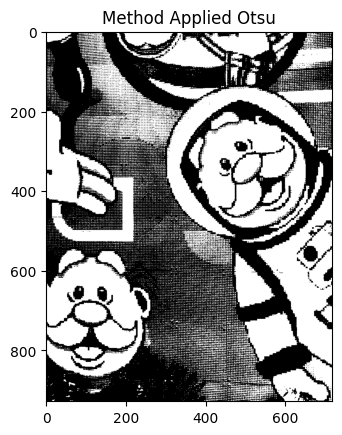

(928, 718)


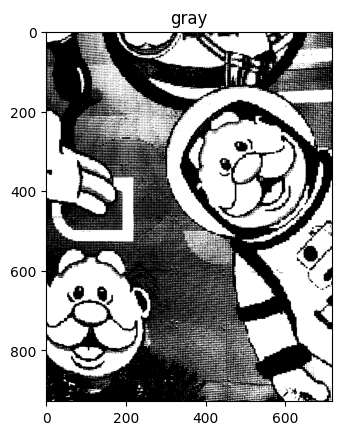

(928, 718)


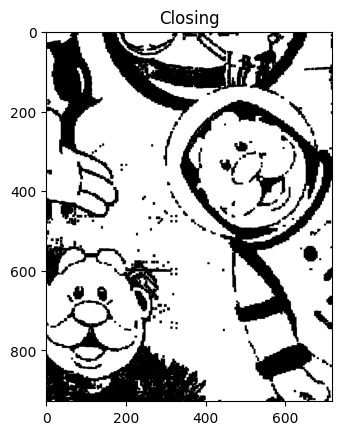

In [104]:
# Section 3 Otsu
simi = cv.imread('img.jpg')
otsu = cv.imread('result.png')

closing(simi, otsu, 'Otsu', 5)